In [1]:
import pylab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
flow = pd.read_csv("flow.tsv", na_values=['-'], delimiter="\t", error_bad_lines=False)
occupancy = pd.read_csv("occupancy.tsv", na_values=['-'], delimiter="\t", error_bad_lines=False)
speed = pd.read_csv("speed.tsv", na_values=['-'], delimiter="\t", error_bad_lines=False)
timestamp = pd.read_csv("timestamp.tsv", na_values=['-'], delimiter="\t", error_bad_lines=False)

In [52]:
flow.head()

14    13
0  21.0  20.0
1   7.0   6.0
2  26.0  23.0
3   9.0  12.0
4  16.0  16.0

In [3]:
df = pd.concat([flow,occupancy,speed,timestamp], axis=1)

In [ ]:
# df.head()

In [4]:
df.columns = ['flow1','flow2','occupancy1','occupancy2','speed1','speed2','timestamp']
df.head()

flow1  flow2  occupancy1  occupancy2  speed1  speed2            timestamp
0   21.0   20.0         9.0        11.0    58.2    63.0  2009-08-19T15:05:52
1    7.0    6.0         2.0         2.0    60.0    63.0  2009-08-19T15:06:52
2   26.0   23.0        10.0        10.0    58.8    61.8  2009-08-19T15:07:53
3    9.0   12.0         3.0         6.0    61.8    61.8  2009-08-19T15:08:53
4   16.0   16.0         6.0         7.0    64.8    63.6  2009-08-19T15:09:53

In [5]:
df1 =  pd.DataFrame({"flow" : df.flow1, "occupancy" : df.occupancy1,"speed" : df.speed1,"timestamp" : df.timestamp,"detector" : "x"})
df2 = pd.DataFrame({"flow" : df.flow2, "occupancy" : df.occupancy2,"speed" : df.speed2,"timestamp" : df.timestamp,"detector" : "y"})
# df3 = pd.DataFrame({"flow" : df.flow3, "occupancy" : df.occupancy3,"speed" : df.speed3,"timestamp" : df.timestamp,"detector" : "z"})

In [46]:
frames = [df1, df2]
result = pd.concat(frames)

In [48]:
result = result.sort_values("timestamp")

In [49]:
result.head()

detector  flow  occupancy  speed            timestamp
0        x  21.0        9.0   58.2  2009-08-19T15:05:52
0        y  20.0       11.0   63.0  2009-08-19T15:05:52
1        y   6.0        2.0   63.0  2009-08-19T15:06:52
1        x   7.0        2.0   60.0  2009-08-19T15:06:52
2        x  26.0       10.0   58.8  2009-08-19T15:07:53

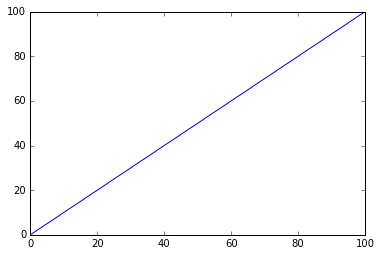

In [8]:
# Finding outlier values for Occoupancy
val = np.sort(result["occupancy"].unique())
plt.plot(val)

# so keeping occupancy threshold as 120 since all values above them show a steep change indicating possible outliers.
# jam_occupancy_threshold = 120

In [13]:
print np.sort(result["flow"].unique())

[-51. -49. -47. -46. -45. -44. -43. -41. -40. -39. -38. -37. -36. -35. -34.
 -33. -32. -31. -30. -29. -28. -27. -26. -25. -24. -23. -22. -21. -20. -19.
 -18. -17. -16. -15. -14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.
  -3.  -2.  -1.   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.
  12.  13.  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.
  27.  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.
  72.  73.  74.  75.  76.  nan]


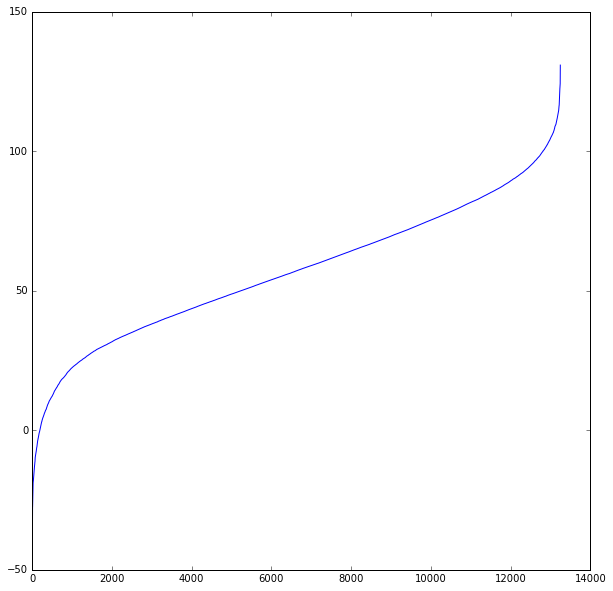

In [11]:
# Outlier speed visualization
plt.figure(figsize=(10,10))
# plt.xlim(550, 650)
plt.plot(np.sort(result["speed"].unique()))

In [19]:
# result[(pd.isnull(result['speed'])) | (pd.isnull(result['occupancy'])) | (pd.isnull(result['flow']))]

In [50]:
removeResult1 = result[(result['speed'] < 0) | (result['flow'] < 0)]
removeResult2 = result[(result['flow'] == 0) & (result['speed'] > 0)]
jam_occupancy_threshold = 100
removeResult3 = result[((result['speed'] == 0) & 
                            (result['flow'] == 0) & 
                            (result['occupancy'] != 0) & 
                            (result['occupancy'] < jam_occupancy_threshold))]
# skewed data
removeResult4 = result[(result['speed'] == 0) & (result['flow'] == 0) & (result["occupancy"] == 0)]
removeResult5 = result[(result['speed'] == 0) & (result['flow'] != 0) & (result["occupancy"] == 0)]
removeResult6 = result[(pd.isnull(result['speed'])) | (pd.isnull(result['occupancy'])) | (pd.isnull(result['flow']))]

In [51]:
result.head()

detector  flow  occupancy  speed            timestamp
0        x  21.0        9.0   58.2  2009-08-19T15:05:52
0        y  20.0       11.0   63.0  2009-08-19T15:05:52
1        y   6.0        2.0   63.0  2009-08-19T15:06:52
1        x   7.0        2.0   60.0  2009-08-19T15:06:52
2        x  26.0       10.0   58.8  2009-08-19T15:07:53

In [21]:
res = result.set_index(["timestamp","detector"]).sort_index()

In [22]:
result = pd.concat([result,removeResult1,removeResult1]).drop_duplicates(keep=False)
result = pd.concat([result,removeResult2,removeResult2]).drop_duplicates(keep=False)
result = pd.concat([result,removeResult3,removeResult3]).drop_duplicates(keep=False)
result = pd.concat([result,removeResult4,removeResult4]).drop_duplicates(keep=False)
result = pd.concat([result,removeResult5,removeResult5]).drop_duplicates(keep=False)
result = pd.concat([result,removeResult6,removeResult6]).drop_duplicates(keep=False)

In [23]:
result = result.sort_values(["flow"])

In [24]:
def sampleData(data, threshold, columnName):
    flowBins = np.zeros(shape=(20,), dtype = object)
    data = data.sort_values(columnName)
    difference = threshold
    high  = difference
    low = 0;
    for i in range(0, 20, 1):
        b = data[data[columnName] < high]
        b = b[b[columnName] >= low]
        flowBins[i] = b
        low = high
        high = high + difference
    return flowBins

In [25]:
flowBins = np.zeros(shape=(20,), dtype = object)
flowBins = sampleData(result, 4 ,"flow")    

In [26]:

flow_occupancy_bin = np.ndarray(shape=(20,20), dtype = object)
for i in range(0,20,1):
    data = pd.DataFrame(flowBins[i])
    flow_occupancy_bin[i] = sampleData(data, 6 ,"occupancy") 

In [27]:
flow_occupancy_speed_bin = np.ndarray(shape=(20,20,20), dtype = object)
for i in range(0,20,1):
    for j in range(0,20,1):
        data = flow_occupancy_bin[i][j];
        flow_occupancy_speed_bin[i][j] = sampleData(data, 7 ,"speed") 

In [28]:
!mkdir output

In [29]:
final_result = pd.DataFrame(columns = ["detector","flow","occupancy","speed","timestamp", "probability"])
total_points = len(result)
#final_result = ["0" , "0", "0", "0"]
for i in range(0,20,1):
    for j in range(0,20,1):
        for k in range(0,20,1):
            prob_data = flow_occupancy_speed_bin[i][j][k]
            points_inside_box = prob_data.shape[0]
            f = prob_data.flow.max() - prob_data.flow.min()
            o = prob_data.occupancy.max() - prob_data.occupancy.min()
            s = prob_data.speed.max() - prob_data.speed.min()
            #volume = f*o*s
            volume = 1170
            if(volume == 0): volume =1
            probability = points_inside_box/float(total_points * volume)
#             print(prob_data)
            prob_data["probability"] = probability
            prob_data.to_csv("output/out" + str(i) + '-' + str(j) + '-' + str(k) + ".csv",sep="\t")
#             print(prob_data.head(1))
#           final_result.add([prob_data['flow'], prob_data['speed'], prob_data['occupancy'], prob_data['probability']])
            #final_result_align, prob_data_align = final_result.align(prob_data,axis=1)
            #final_result = pd.concat([final_result_align, prob_data_align])
            #final_result = np.append(final_result, [prob_data['flow'], prob_data['speed'], prob_data['occupancy'], prob_data['probability']])

In [30]:
! cat output/*.csv > merged.csv

In [31]:
!rm -rf output/

In [53]:
merged = pd.read_csv("merged.csv", na_values=['-'], delimiter="\t", error_bad_lines=False)

In [54]:
removeHeader = merged[merged["probability"] == "probability"]

In [55]:
merged = pd.concat([merged,removeHeader,removeHeader]).drop_duplicates(keep=False)

In [56]:
merged.tail()

Unnamed: 0 detector  flow occupancy speed            timestamp  \
5757618   1444377.0        y  39.0      56.0  39.6  2012-07-30T08:20:51   
5757620   1393050.0        y  37.0      55.0  42.6  2012-06-23T09:15:49   
5757621   1233438.0        x  37.0      54.0  43.2  2012-03-02T17:43:13   
5757622   2023906.0        y  38.0      59.0  45.6  2013-09-27T21:47:40   
5757623   1498179.0        x  36.0      54.0  46.2  2012-09-06T09:34:11   

               probability  
5757618  1.78383892948e-09  
5757620  5.94612976492e-10  
5757621  5.94612976492e-10  
5757622  5.94612976492e-10  
5757623  5.94612976492e-10

In [61]:
# merged = merged.reset_index(drop=True)
merged["probability"] = merged["probability"].apply(pd.to_numeric)
merged = merged.sort_values(["probability"])
final_columns = ['flow', 'speed', 'occupancy', 'probability']
merged = merged[final_columns]

In [62]:
merged.tail()

flow         speed occupancy  probability
5427025  17.0  62.758490392       7.0     0.000072
5427024  17.0  62.758490392       6.0     0.000072
5427023  18.0  62.758490392       7.0     0.000072
5427035  19.0  62.758490392       7.0     0.000072
5749627    18            60         7     0.000072

In [63]:
# merged
final_result = pd.DataFrame(columns = ["flow","speed","occupancy", "probability"])
for i in range(0,len(merged),100):
    final_result = final_result.append(merged.iloc[[i]])

In [64]:
final_result.to_csv("3232_2.txt",sep="\t", index=False)

In [ ]:
final_result.head()

In [ ]:
# len(merged)